In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [338]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
# X=X.drop(['Population','AveOccup'],axis=1)
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [339]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [340]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [341]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Se separa el dataset en entrenamiento y evaluación

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [343]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [344]:
X_train_scaled.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


Aquí se muestra un ejemplo de validación cruzada.

- Usamos método de 5-folds
- Usamos el MSE. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) usa el valor negativo por motivos de simplificar el funcionamiento de otras funciones de la libreria.

In [345]:
# Creamos un modelo
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Este la forma que se implementa en scikit-learn
cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# Este calculo nos devuelve el valor de MSE para cada una de los folds
cv

array([-0.54786366, -0.5008472 , -0.52047089, -0.51611229, -0.54882174])

In [346]:
# Podemos obtener el valor medio y desvio estandar de cada caso:
print(f"La media del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {(-1)*cv.mean()}")
print(f"El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {cv.std()}")

La media del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.5268231539349313
El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.018742809748334553


In [347]:
# Acá generamos varios valores de alpha para la búsqueda pedida en el TP.

In [348]:
alpha_values = np.linspace(0, 12.5, 100)
alpha_values

array([ 0.        ,  0.12626263,  0.25252525,  0.37878788,  0.50505051,
        0.63131313,  0.75757576,  0.88383838,  1.01010101,  1.13636364,
        1.26262626,  1.38888889,  1.51515152,  1.64141414,  1.76767677,
        1.89393939,  2.02020202,  2.14646465,  2.27272727,  2.3989899 ,
        2.52525253,  2.65151515,  2.77777778,  2.9040404 ,  3.03030303,
        3.15656566,  3.28282828,  3.40909091,  3.53535354,  3.66161616,
        3.78787879,  3.91414141,  4.04040404,  4.16666667,  4.29292929,
        4.41919192,  4.54545455,  4.67171717,  4.7979798 ,  4.92424242,
        5.05050505,  5.17676768,  5.3030303 ,  5.42929293,  5.55555556,
        5.68181818,  5.80808081,  5.93434343,  6.06060606,  6.18686869,
        6.31313131,  6.43939394,  6.56565657,  6.69191919,  6.81818182,
        6.94444444,  7.07070707,  7.1969697 ,  7.32323232,  7.44949495,
        7.57575758,  7.7020202 ,  7.82828283,  7.95454545,  8.08080808,
        8.20707071,  8.33333333,  8.45959596,  8.58585859,  8.71

Correlación entre los atributos y los atributos con el target

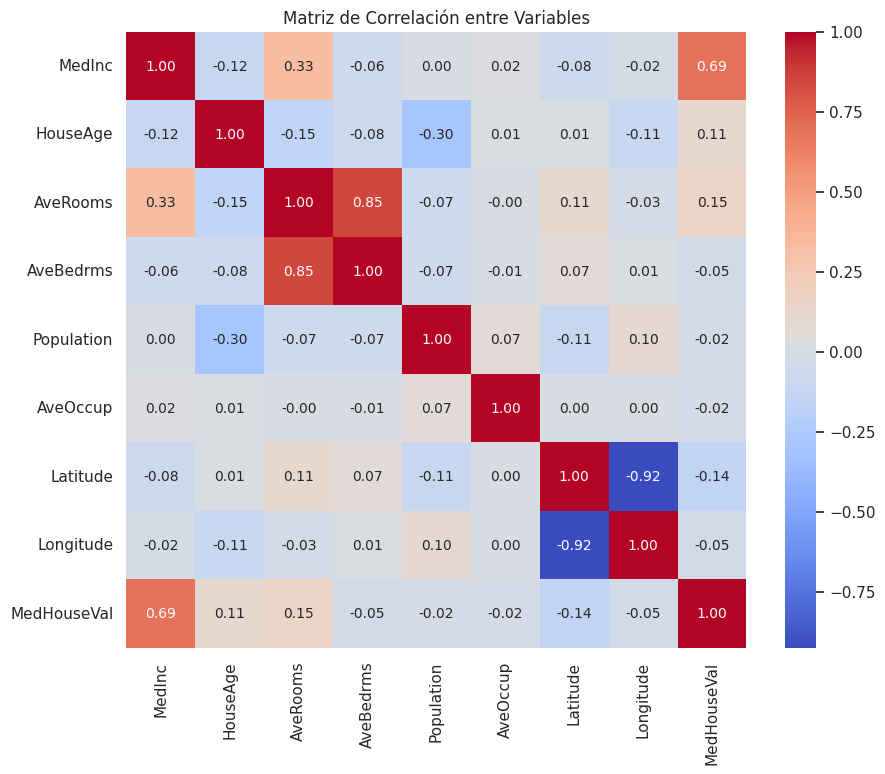

In [349]:
# podemos ver cuál es la relación entre ambas variables....
correlation_matrix = df_california.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size": 10}, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

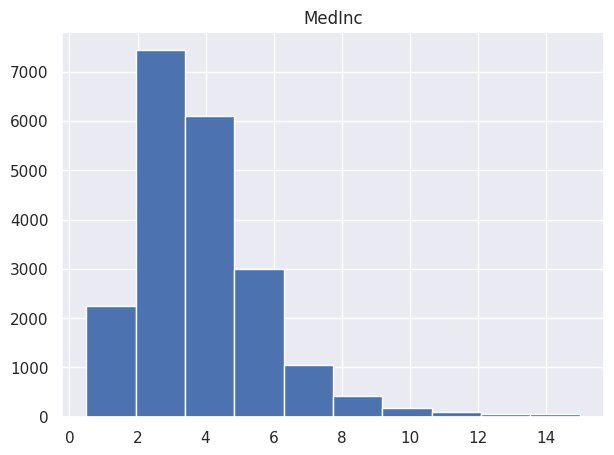

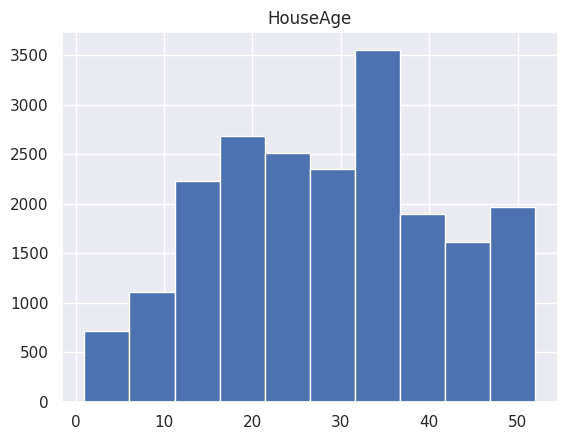

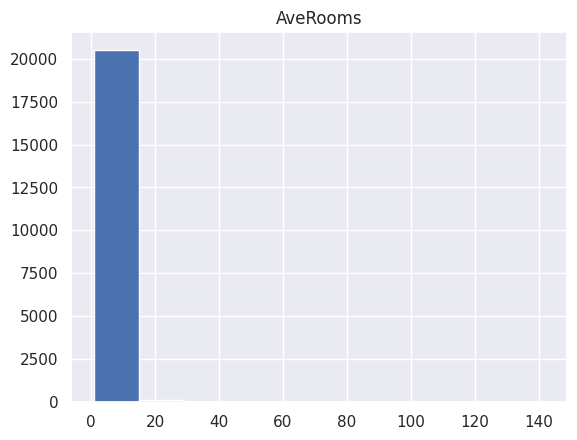

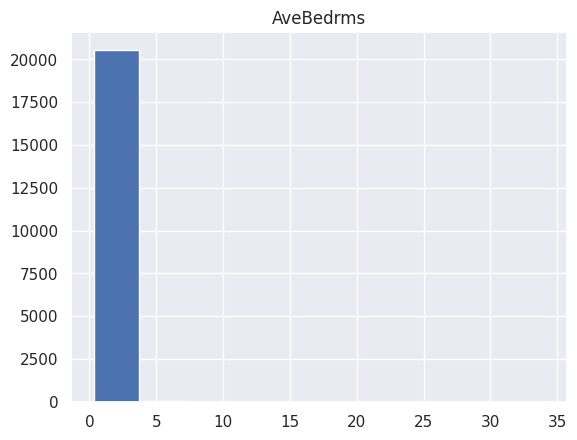

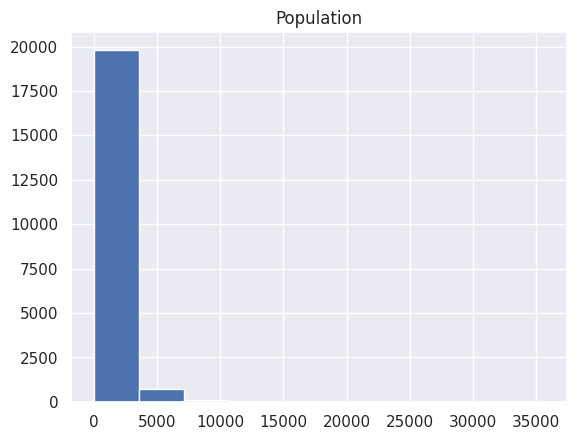

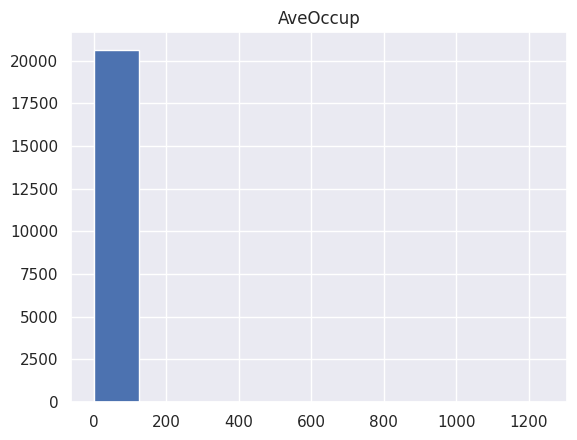

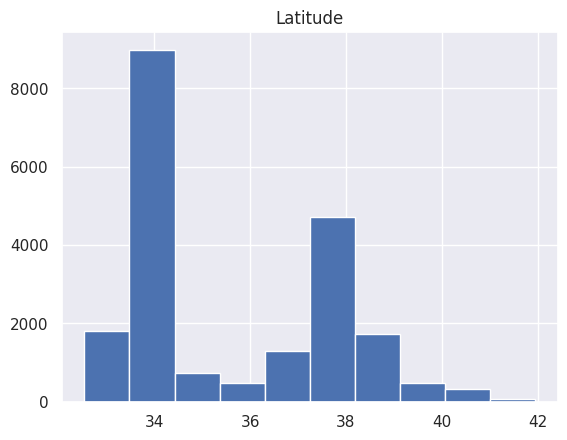

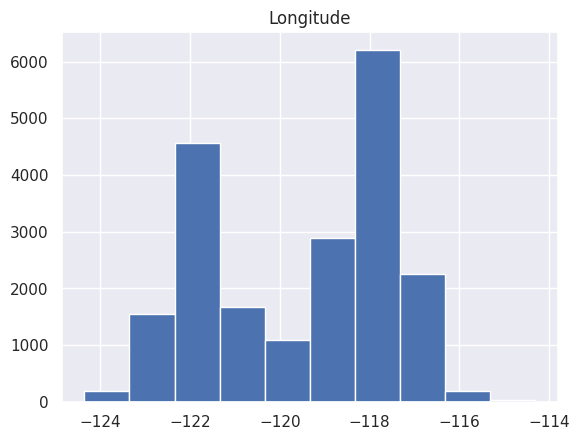

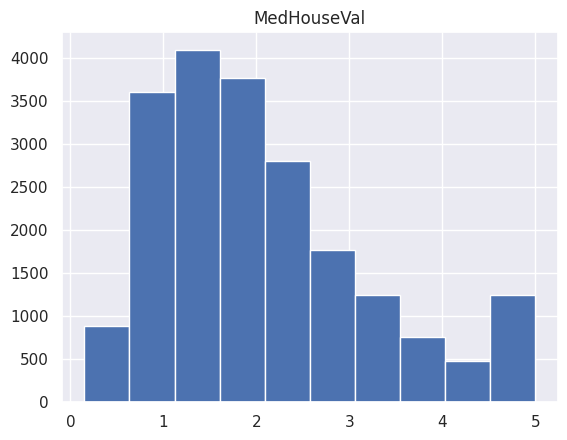

In [350]:
# Pandas nos da algunas herramientas de graficado
plt.figure(figsize=(7, 5))
#dataset.Time.hist()
for var in df_california.columns:
    df_california[var].hist()
    plt.title(var)
    plt.show()


Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [351]:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
regresion.fit(X_train_scaled, y_train)

LinearRegression()

In [352]:
# Una vez entrenado, podemos ver diferente información del modelo:
print(f"El valor de la intersección de la recta sera {regresion.intercept_ }")
print(f"El valor del coeficiente de la recta sera {regresion.coef_ }")

print(f"El coeficiente de Pearson es {regresion.score(X_train_scaled, y_train)}")

# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-6))
print(f"Desvío estándar del modelo {std_dev_model}")
print(f"Desvío estándar del label {np.std(y_train)}")



El valor de la intersección de la recta sera 2.0692396089424165
El valor del coeficiente de la recta sera [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
El coeficiente de Pearson es 0.6093459727972159
Desvío estándar del modelo 0.723584867399972
Desvío estándar del label 1.157452365098417


6192
6192


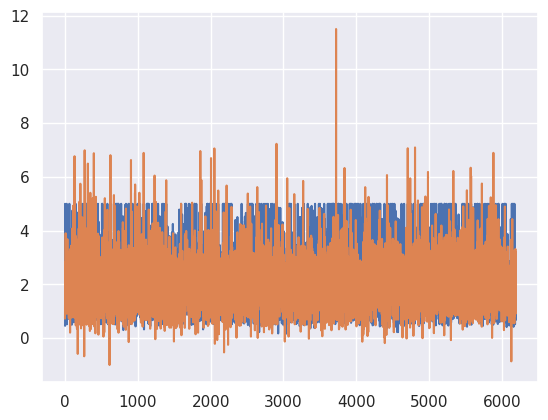

R-cuadrado en test: 0.5957702326061664
Error absoluto medio: 0.5272474538305955
Error cuadratico medio: 0.5305677824766752
Raiz de error cuadratico medio: 0.7284008391515452
Error absoluto porcentual medio: 31.75%
Error porcentual medio: -12.72%


In [353]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#scikit-learn no tiene el error porcentual medio (MPE) lo vamos a crear nosotros

def mean_porcentual_error(yreal, ypred):

    return np.mean((yreal-ypred)/yreal)

y_pred = regresion.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)

j=range(len(y_test))
plt.plot(j,y_test)
plt.plot(j,y_pred)
print(len(y_test))
print(len(y_pred))




plt.show()

print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")
print(f"Error porcentual medio: {mpe*100:.2f}%")


Como se puede observar de los resultados que el modelo predice subestimando el valor del target. 

1. **R-cuadrado (0.595)**: Un R² de 0.595 indica que el modelo es capaz de explicar el 59.5% de la variabilidad en los datos de prueba. Esto sugiere que el modelo tiene una capacidad moderada para predecir el valor objetivo. Sin embargo, cerca del 40.5% de la variabilidad no es explicada por el modelo, lo cual podría indicar que hay factores importantes que el modelo no está capturando o que existe ruido en los datos.

2. **Error Absoluto Medio (MAE: 0.528)**: El MAE de 0.528 sugiere que, en promedio, las predicciones del modelo se desvían del valor real por 52800 dolares. Esto indica que, aunque el error no es excesivamente grande comparado con los 600000 dolares que es el valor medio de las casas en California, existe una desviación consistente en las predicciones que podría ser mejorada.

3. **Error Cuadrático Medio (MSE: 0.532)** y **Raíz del Error Cuadrático Medio (RMSE: 0.729)**: El MSE de 0.532 y el RMSE de 0.729 muestran que hay un margen de error notable en las predicciones, con errores más grandes penalizados más fuertemente debido al cuadrado de las diferencias. El RMSE, en particular, sugiere que las predicciones se desvían en promedio 0.729 unidades del valor real.

4. **Error Absoluto Porcentual Medio (MAPE: 31.80%)**: El MAPE del 31.8% indica que, en promedio, las predicciones están desviadas un 31.8% del valor real. Este es un error relativamente alto, lo que sugiere que el modelo tiene dificultades para hacer predicciones precisas en términos porcentuales. 

5. **Error Porcentual Medio (MPE: -12.71%)**: El MPE de -12.71% revela que, en promedio, las predicciones del modelo están sesgadas hacia valores más bajos que los reales en un 12.71%. Este sesgo negativo significa que el modelo tiende a subestimar el valor objetivo.

### **Conclusión sobre la calidad de predicción del modelo:**

- **Fortalezas**:
  - El modelo explica una parte razonable de la variabilidad en los datos (R² = 0.595), lo que sugiere que captura algunas de las relaciones subyacentes en los datos.
  
- **Debilidades**:
  - Los errores porcentuales (MAPE de 31.8% y MPE de -12.71%) son altos, lo que indica una falta de precisión y un sesgo negativo.
  - El RMSE relativamente alto (0.729) también sugiere que los errores son significativos, especialmente en los casos con errores grandes.

**En resumen**, aunque el modelo tiene una capacidad moderada para explicar los datos, la precisión de sus predicciones es cuestionable, con una tendencia a subestimar los valores y cometer errores relativamente grandes. Mejoras en el modelo podrían incluir la inclusión de más variables relevantes, ajustes en la estructura del modelo o la utilización de técnicas de regularización para reducir los errores y mejorar la precisión.

In [354]:
# # Y si lo graficamos? Graficar siempre nos dara una mejor idea de lo que sucede
# plt.figure(figsize=(14, 10))
# plt.title('Concentración de droga vs. tiempo', fontsize=16)
# plt.xlabel('Tiempo [h]', fontsize=14)
# plt.ylabel('Concentración [mg/L]', fontsize=14)
# plt.tick_params(axis='x', labelsize=12)
# plt.tick_params(axis='y', labelsize=12)

# #plt.scatter(X_train["MedInc"], y_train)
# plt.plot(X_train, regresion.predict(X_train), color="b", linewidth=2)

# plt.ylim(0)  # Establece el límite inferior del eje y en cero
# plt.show()

In [355]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size - 2))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 76.19259259267216


Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α


In [357]:
from sklearn.linear_model import Ridge, Lasso

coeffs_lasso = np.zeros([5000, 8])
coeffs_ridge = np.zeros([5000, 8])

# Guardamos los coeficientes de la regresión lineal (alpha = 0)
coeffs_lasso[0, :] = regresion.coef_.copy()
coeffs_ridge[0, :] = regresion.coef_.copy()
alpha_array = np.arange(0, 10000, 2)

# Calculamos los coeficientes para diferentes valores de lambda
for index, alpha in enumerate(alpha_array):

    if index == 0:
        continue

    # Creamos los modelos
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)

    # Los entrenamos
    lasso_model.fit(X_train_scaled, y_train)
    ridge_model.fit(X_train_scaled, y_train)

    # Guardamos los coeficientes de las regresiones
    coeffs_lasso[index, :] = lasso_model.coef_.copy()
    coeffs_ridge[index, :] = ridge_model.coef_.copy()